In [129]:
import pandas as pd
import keras
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
keras_dat = pd.read_csv("keras_test.csv", delimiter = ",")
keras_dat.shape 

(3603, 48)

In [130]:
# for the sake of following data camp seperate predictors and y
data_camp_y = keras_dat.drop_out
data_camp_y = to_categorical(data_camp_y)
data_camp_y = pd.DataFrame(data = data_camp_y)
data_camp_predictors = keras_dat.drop(["drop_out"], axis = 1)
data_camp_y
#data_camp_predictors

,0,1
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
3598,0.0,1.0
3599,1.0,0.0
3600,0.0,1.0
3601,0.0,1.0


In [131]:
# Save the number of columns in predictors: n_cols
n_cols = data_camp_predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(600, activation="relu", input_shape=(n_cols,)))
model.add(Dense(600, activation = "relu"))
model.add(Dense(600, activation = "relu"))
model.add(Dense(600, activation = "relu"))
# Add the second layer
model.add(Dense(2, activation = "softmax"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
# How many epochs can go without improving 
early_stopping_monitor = EarlyStopping(patience = 3)

In [132]:
model_results = model.fit(data_camp_predictors, data_camp_y, validation_split = .3, epochs = 20, callbacks = [early_stopping_monitor])

Train on 2522 samples, validate on 1081 samples
Epoch 1/20
2522/2522 [==============================] - 2s 915us/step - loss: 0.7207 - accuracy: 0.5987 - val_loss: 0.6859 - val_accuracy: 0.5578
Epoch 2/20
2522/2522 [==============================] - 2s 721us/step - loss: 0.6642 - accuracy: 0.6162 - val_loss: 0.6801 - val_accuracy: 0.5856
Epoch 3/20
2522/2522 [==============================] - 2s 753us/step - loss: 0.6416 - accuracy: 0.6427 - val_loss: 0.6989 - val_accuracy: 0.5745
Epoch 4/20
2522/2522 [==============================] - 2s 732us/step - loss: 0.6346 - accuracy: 0.6459 - val_loss: 0.7055 - val_accuracy: 0.5634
Epoch 5/20
2522/2522 [==============================] - 2s 771us/step - loss: 0.6225 - accuracy: 0.6439 - val_loss: 0.6864 - val_accuracy: 0.5735


In [133]:
model_results.history["accuracy"]
model_results.history["val_accuracy"]

[0.5578168630599976,
 0.585568904876709,
 0.5744680762290955,
 0.5633672475814819,
 0.5735430121421814]

AttributeError: module 'matplotlib.pyplot' has no attribute 'legnd'

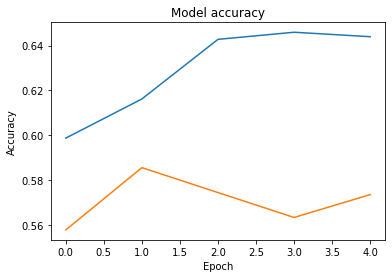

In [135]:
#Plot the accuracy for training and testing
plt.figure()
plt.plot(model_results.history["accuracy"])
plt.plot(model_results.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legnd(["Train", "test"])
plt.show()

In [127]:
model.save("model.h5")
best_drop_model = ModelCheckpoint('model.hdf5', save_best_only = True)
# Figure out how to save the best model and then loiad in later
#best_drop_model.save("best_drop_model.h5")

AttributeError: 'ModelCheckpoint' object has no attribute 'save'

In [86]:
my_model = load_model("model.h5")
my_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               4800      
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 202       
Total params: 25,202
Trainable params: 25,202
Non-trainable params: 0
_________________________________________________________________


In [85]:
predictions = my_model.predict(keras_dat_predict)
predictions
prob_true = predictions[:,1]
prob_true

array([0.6849164 , 0.664508  , 0.6975734 , 0.7072552 , 0.8189338 ,
       0.6766609 , 0.6766609 , 0.654953  , 0.654953  , 0.654953  ,
       0.654953  , 0.668959  , 0.6959559 , 0.74295026, 0.7473181 ,
       0.6559704 , 0.6559704 , 0.7415731 , 0.7046431 , 0.7889785 ,
       0.7611214 , 0.7816403 , 0.65388167, 0.5782211 , 0.7051265 ,
       0.752768  , 0.6980557 , 0.69333255, 0.69333255, 0.69333255,
       0.6933325 , 0.5885405 , 0.5885405 , 0.74701625, 0.6837417 ,
       0.64280033, 0.64280033, 0.6413607 , 0.7217066 , 0.66664654,
       0.70934314, 0.7798905 , 0.7798905 , 0.66473776, 0.66473776,
       0.638469  , 0.60716045, 0.65300995, 0.7576994 , 0.7775698 ,
       0.77926147, 0.61763537, 0.61763537, 0.74563384, 0.7128213 ,
       0.6798767 , 0.6798767 , 0.66528326, 0.7433876 , 0.78089076,
       0.7551341 , 0.660503  , 0.68807304, 0.8190979 , 0.67995524,
       0.72214836, 0.7326396 , 0.7379526 , 0.7379526 , 0.7050978 ,
       0.6996518 , 0.7163151 , 0.7163151 , 0.77524525, 0.68616

Epoch 1/1
3603/3603 [==============================] - 0s 32us/step - loss: 9.0204


In [3]:
keras_dat.head()

,Quarter.x,Agegroup.x,OverallHealth.x,CapableManagingHealthCareNeeds.x,HandlingDailyLife.x,ControlLife.x,DealWithCrisis.x,GetsAlongWithFamily.x,SocialSituations.x,FunctioningHousing.x,...,Gender.x,RaceWhite.x,RaceBlack.x,Housing.x,Employment.x,drop_out,anxiety,mdd_r,mdd_s,another_sex_ident
0,2,8,4,3,2,3,2,3,2,4,...,1,0,1,1,0,0,0,0,1,0
1,1,6,1,1,4,4,4,4,4,3,...,0,1,0,0,1,0,0,1,0,1
2,2,8,4,1,4,4,4,5,5,4,...,0,0,1,1,0,1,0,0,0,0
3,1,8,2,1,2,4,4,1,5,1,...,0,1,0,0,0,0,0,0,0,0
4,2,8,5,2,2,4,4,4,4,4,...,0,1,0,1,0,1,0,1,0,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

In [27]:
keras_dat.drop_out

0       0
1       0
2       1
3       0
4       1
       ..
3598    1
3599    0
3600    1
3601    1
3602    1
Name: drop_out, Length: 3603, dtype: int64

In [29]:
y = keras_dat.drop_out
X_train, X_test, y_train, y_test = train_test_split(keras_dat["drop_out"], y, test_size = .33, random_state = 53)

In [31]:
X_test

1900    0
3289    0
1299    0
1472    1
179     0
       ..
703     1
498     0
2544    0
994     0
773     0
Name: drop_out, Length: 1189, dtype: int64

In [7]:
X_train

254      dropped out senior year of high school
252                                 High School
165                                  9 th grade
22     high school, couple semesters of college
34                                          GED
                         ...                   
186                                 high school
150                                some college
189                                          13
251                  did not finish high school
25                           3 years of college
Name: Education, Length: 190, dtype: object

In [8]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [9]:
count_vectorizer.get_feature_names()[10:40]

['18',
 '1985',
 '20',
 '2011',
 '2013',
 '7th',
 '8th',
 '9th',
 'aa',
 'achieve',
 'admin',
 'apprenticeship',
 'arrived',
 'arts',
 'assoc',
 'associate',
 'associates',
 'attending',
 'ba',
 'bachelor',
 'bachelors',
 'born',
 'bs',
 'business',
 'care',
 'carolina',
 'child',
 'client',
 'clt',
 'cna']

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)

In [11]:
metrics.accuracy_score(y_test, pred)

0.8421052631578947

In [12]:
metrics.precision_score(y_test, pred, average = "weighted")

0.8518080916577158

In [13]:
metrics.recall_score(y_test, pred, average = "weighted")

0.8421052631578947

,Education,CodesMatt
0,I graduated high school,1.0
1,"11th, 3 credits short from graduating high school",0.0
2,"11th, 3 credits short from graduating high school",0.0
3,high school,1.0
4,14 years,2.0
...,...,...
280,three years of college,2.0
281,GED,1.0
282,GED,1.0
283,GED,1.0


ValueError: Error when checking input: expected dense_9_input to have shape (100,) but got array with shape (1,)